In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

samples_bkg = [
    "TTJets",
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", location_cfg="signal_v6.yaml")
#fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", location_cfg="signal_v6.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", location_cfg="backgrounds.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']
#fileset_2mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
#output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]
#out_2mu = output_2mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [5]:
samples_4mu = [
    "TTJets",
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]

In [6]:
for sample in samples_4mu:
    print(sample, "Total LJs", out_4mu[sample]['counters']['0.4']['base']['Total LJs'])
    print(sample, "Total Matched Jets", out_4mu[sample]['counters']['0.4']['base']['Total Matched-Jets'])
    print(sample, "LJs (have matched Jet)", out_4mu[sample]['counters']['0.4']['base']['LJs (have matched Jet)'])
    print("")
    print(sample, "Mu LJs", out_4mu[sample]['counters']['0.4']['base']['Mu-LJs'])
    print(sample, "Leaindg-Mu-Matched Jets", out_4mu[sample]['counters']['0.4']['base']['Leading-Mu-Matched-Jets'])
    print(sample, "Subleading-Mu-Matched Jets", out_4mu[sample]['counters']['0.4']['base']['Subleading-Mu-Matched-Jets'])
    print("")
    print(sample, "EGM LJs", out_4mu[sample]['counters']['0.4']['base']['EGM-LJs'])
    print(sample, "EGM-Matched Jets", out_4mu[sample]['counters']['0.4']['base']['EGM-Matched-Jets'])
    print("##################################################")

TTJets Total LJs 76
TTJets Total Matched Jets 76
TTJets LJs (have matched Jet) 76

TTJets Mu LJs 38
TTJets Leaindg-Mu-Matched Jets 37
TTJets Subleading-Mu-Matched Jets 1

TTJets EGM LJs 38
TTJets EGM-Matched Jets 37
##################################################
4Mu_500GeV_5p0GeV_0p08mm Total LJs 44221
4Mu_500GeV_5p0GeV_0p08mm Total Matched Jets 44201
4Mu_500GeV_5p0GeV_0p08mm LJs (have matched Jet) 44201

4Mu_500GeV_5p0GeV_0p08mm Mu LJs 44199
4Mu_500GeV_5p0GeV_0p08mm Leaindg-Mu-Matched Jets 22101
4Mu_500GeV_5p0GeV_0p08mm Subleading-Mu-Matched Jets 22097

4Mu_500GeV_5p0GeV_0p08mm EGM LJs 22
4Mu_500GeV_5p0GeV_0p08mm EGM-Matched Jets 22
##################################################
4Mu_500GeV_5p0GeV_0p8mm Total LJs 43136
4Mu_500GeV_5p0GeV_0p8mm Total Matched Jets 43120
4Mu_500GeV_5p0GeV_0p8mm LJs (have matched Jet) 43118

4Mu_500GeV_5p0GeV_0p8mm Mu LJs 43114
4Mu_500GeV_5p0GeV_0p8mm Leaindg-Mu-Matched Jets 21560
4Mu_500GeV_5p0GeV_0p8mm Subleading-Mu-Matched Jets 21552

4Mu_500GeV_

Text(300, 4, '4Mu_500GeV_5p0GeV_0p08mm')

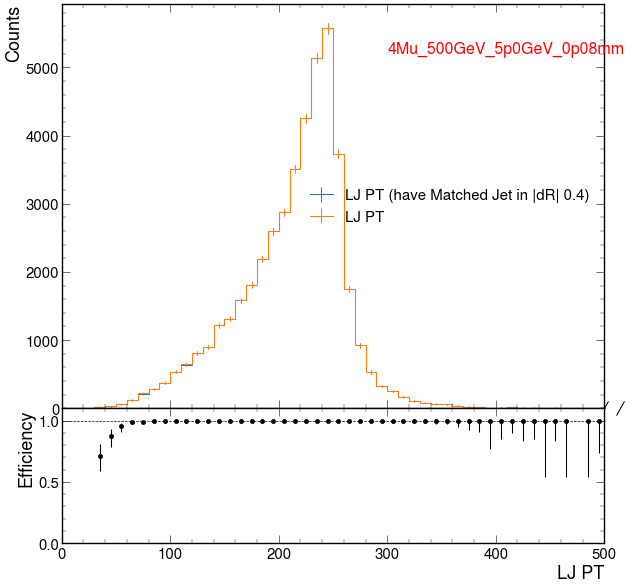

In [31]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_pt_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="LJ PT (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(300, 4, "4Mu_500GeV_5p0GeV_0p08mm", fontsize=23, color='r')

Text(3.5, 2, '4Mu_500GeV_5p0GeV_0p08mm')

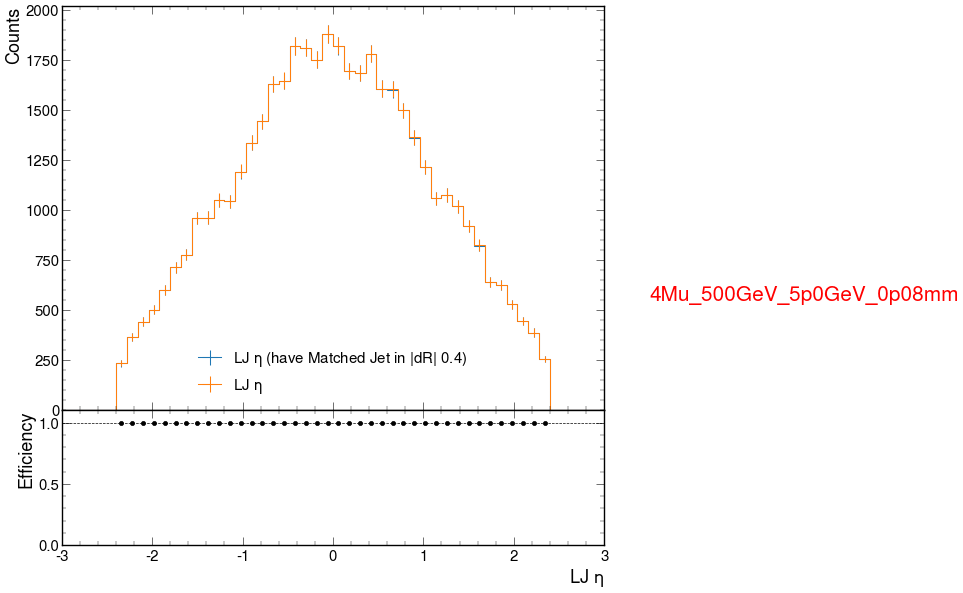

In [8]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_eta_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_eta"][channels[0],:], 
       rp_num_label="LJ $\eta$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\eta$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\eta$")
plt.text(3.5, 2, "4Mu_500GeV_5p0GeV_0p08mm", fontsize=30, color='r')

Text(3.5, 2, '4Mu_500GeV_5p0GeV_0p08mm')

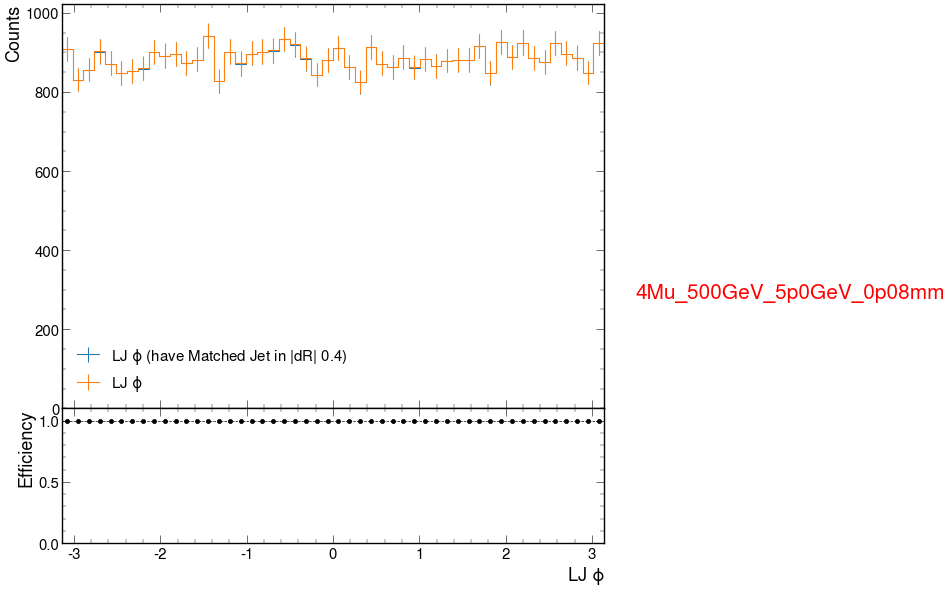

In [9]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_phi_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_phi"][channels[0],:], 
       rp_num_label="LJ $\phi$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\phi$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\phi$")
plt.text(3.5, 2, "4Mu_500GeV_5p0GeV_0p08mm", fontsize=30, color='r')

Text(550, 2, '4Mu_500GeV_5p0GeV_0p8mm')

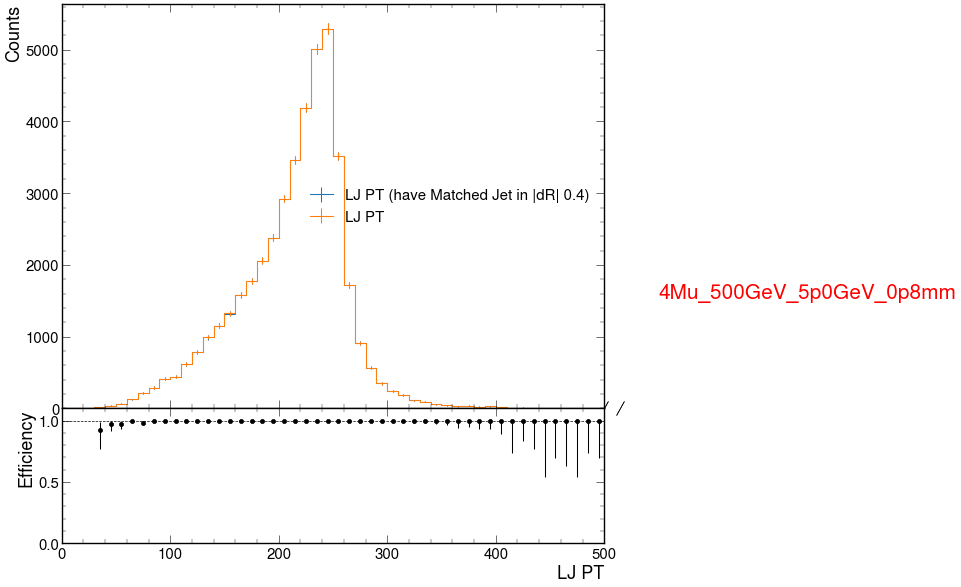

In [10]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_0p8mm"]["hists"]["lj_pt_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_0p8mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="LJ PT (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "4Mu_500GeV_5p0GeV_0p8mm", fontsize=30, color='r')

Text(3.5, 2, '4Mu_500GeV_5p0GeV_0p8mm')

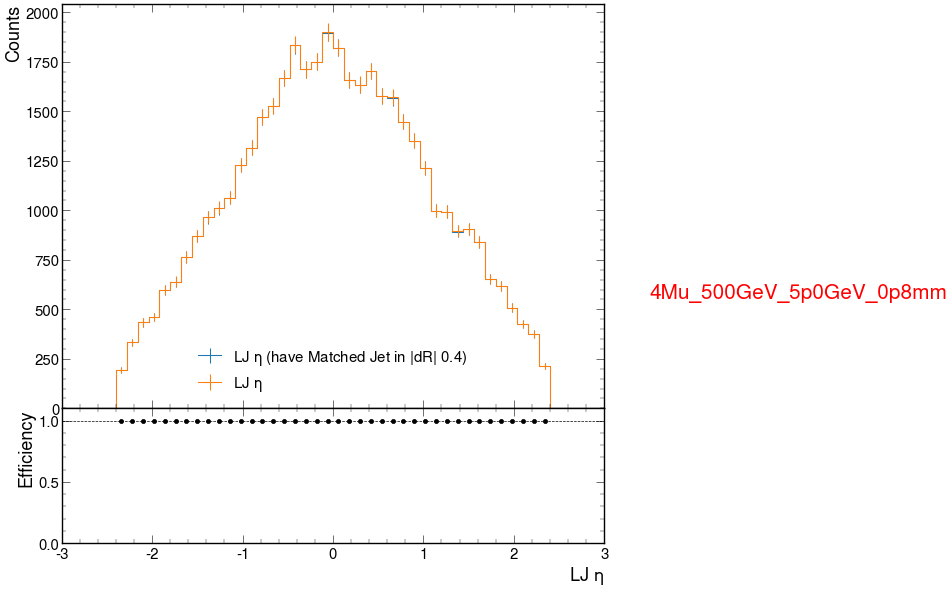

In [11]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_0p8mm"]["hists"]["lj_eta_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_0p8mm"]["hists"]["lj_eta"][channels[0],:], 
       rp_num_label="LJ $\eta$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\eta$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\eta$")
plt.text(3.5, 2, "4Mu_500GeV_5p0GeV_0p8mm", fontsize=30, color='r')

Text(3.5, 2, '4Mu_500GeV_5p0GeV_0p8mm')

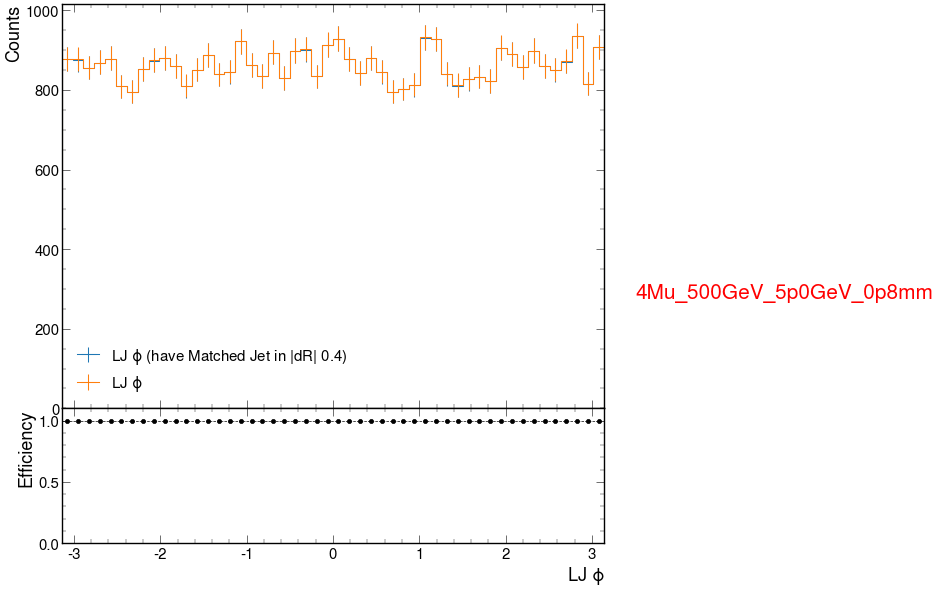

In [12]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_0p8mm"]["hists"]["lj_phi_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_0p8mm"]["hists"]["lj_phi"][channels[0],:], 
       rp_num_label="LJ $\phi$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\phi$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\phi$")
plt.text(3.5, 2, "4Mu_500GeV_5p0GeV_0p8mm", fontsize=30, color='r')

Text(550, 2, '4Mu_500GeV_5p0GeV_8p0mm')

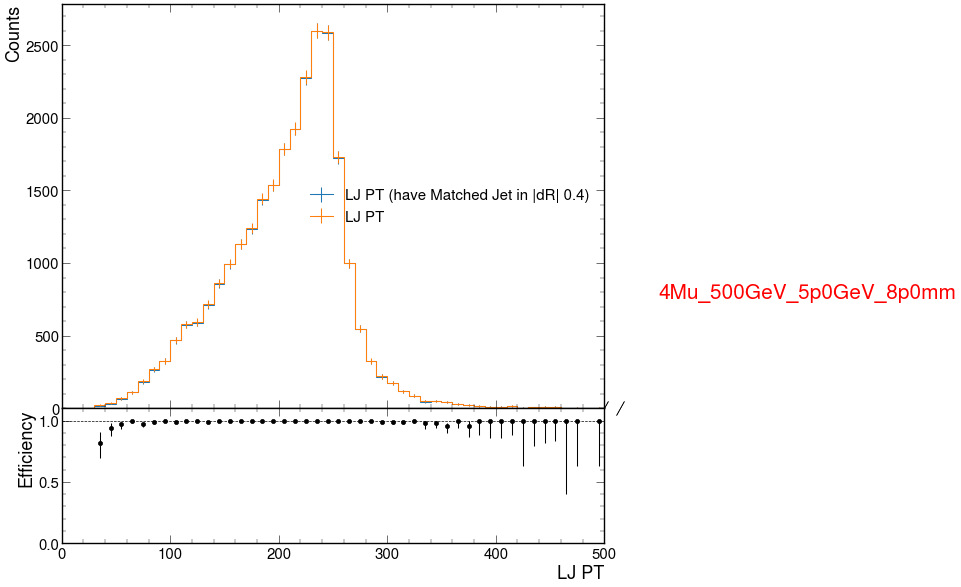

In [13]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_8p0mm"]["hists"]["lj_pt_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_8p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="LJ PT (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "4Mu_500GeV_5p0GeV_8p0mm", fontsize=30, color='r')

Text(3.5, 2, '4Mu_500GeV_5p0GeV_8p0mm')

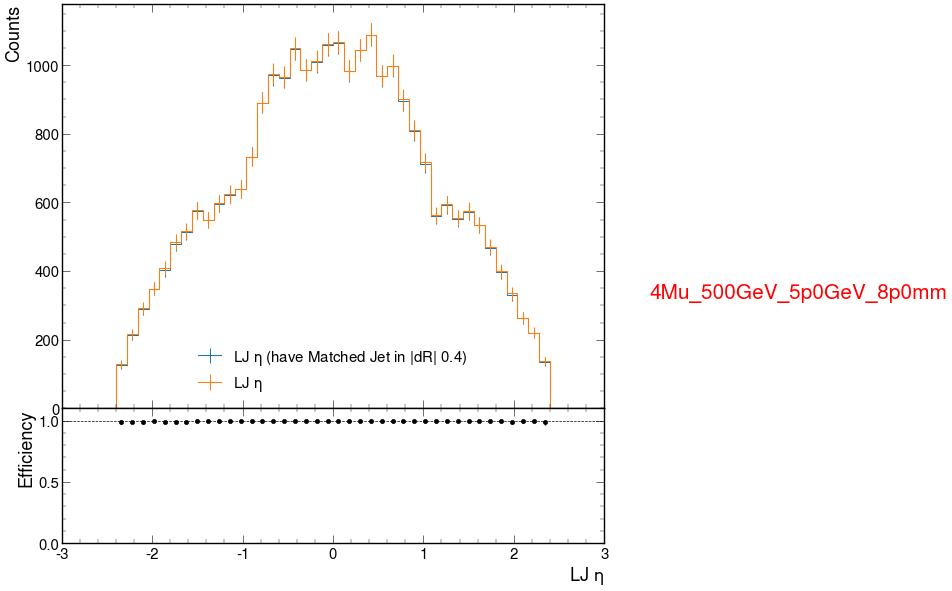

In [14]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_8p0mm"]["hists"]["lj_eta_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_8p0mm"]["hists"]["lj_eta"][channels[0],:], 
       rp_num_label="LJ $\eta$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\eta$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\eta$")
plt.text(3.5, 2, "4Mu_500GeV_5p0GeV_8p0mm", fontsize=30, color='r')

Text(3.5, 2, '4Mu_500GeV_5p0GeV_8p0mm')

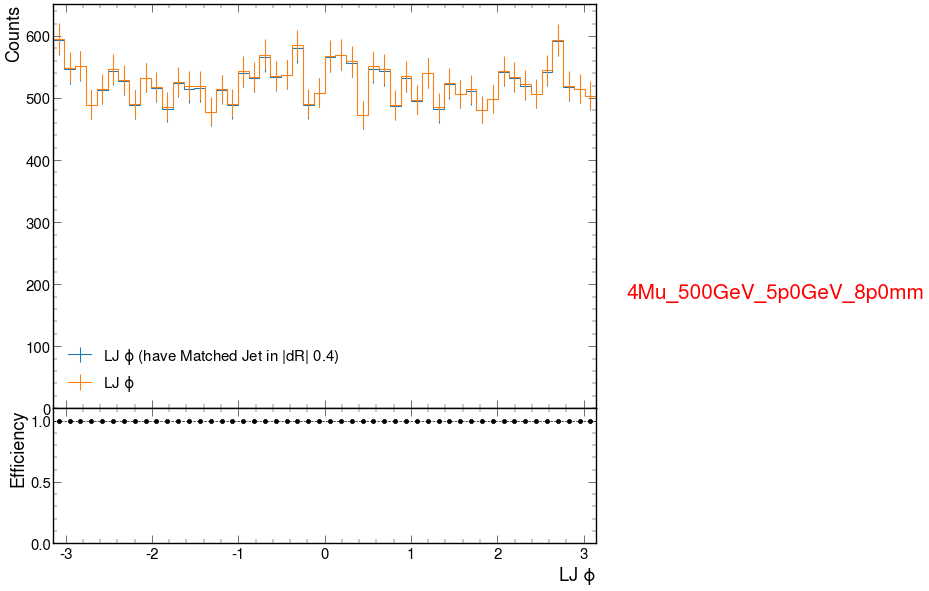

In [15]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_8p0mm"]["hists"]["lj_phi_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_8p0mm"]["hists"]["lj_phi"][channels[0],:], 
       rp_num_label="LJ $\phi$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\phi$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\phi$")
plt.text(3.5, 2, "4Mu_500GeV_5p0GeV_8p0mm", fontsize=30, color='r')

Text(550, 2, '4Mu_500GeV_5p0GeV_40p0mm')

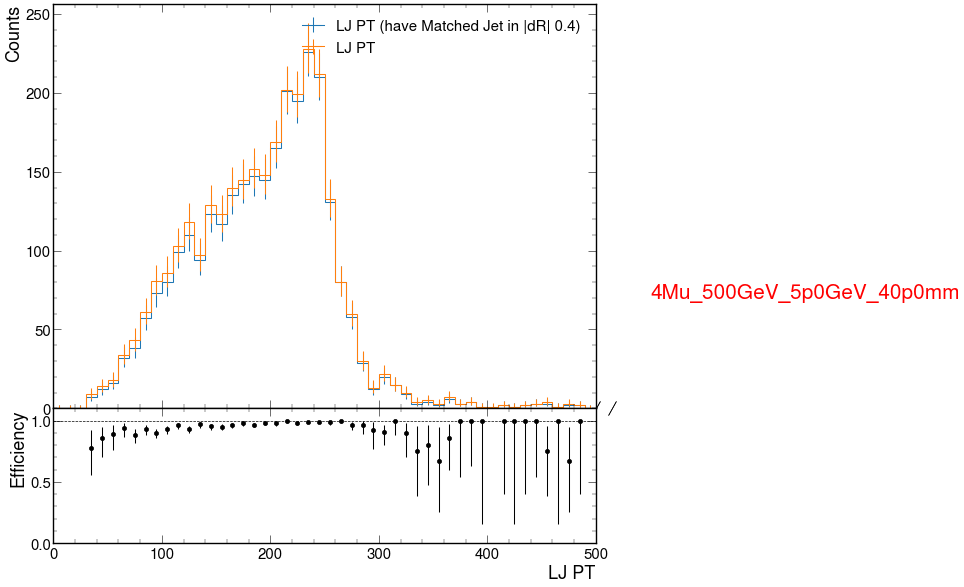

In [16]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_40p0mm"]["hists"]["lj_pt_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_40p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="LJ PT (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "4Mu_500GeV_5p0GeV_40p0mm", fontsize=30, color='r')

Text(3.5, 2, '4Mu_500GeV_5p0GeV_40p0mm')

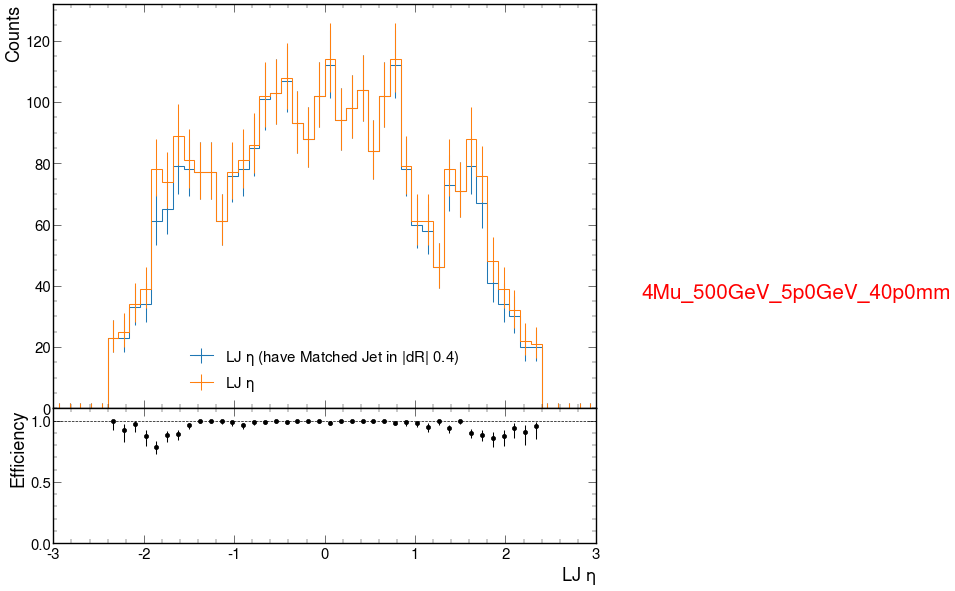

In [17]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_40p0mm"]["hists"]["lj_eta_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_40p0mm"]["hists"]["lj_eta"][channels[0],:], 
       rp_num_label="LJ $\eta$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\eta$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\eta$")
plt.text(3.5, 2, "4Mu_500GeV_5p0GeV_40p0mm", fontsize=30, color='r')

Text(3.5, 2, '4Mu_500GeV_5p0GeV_40p0mm')

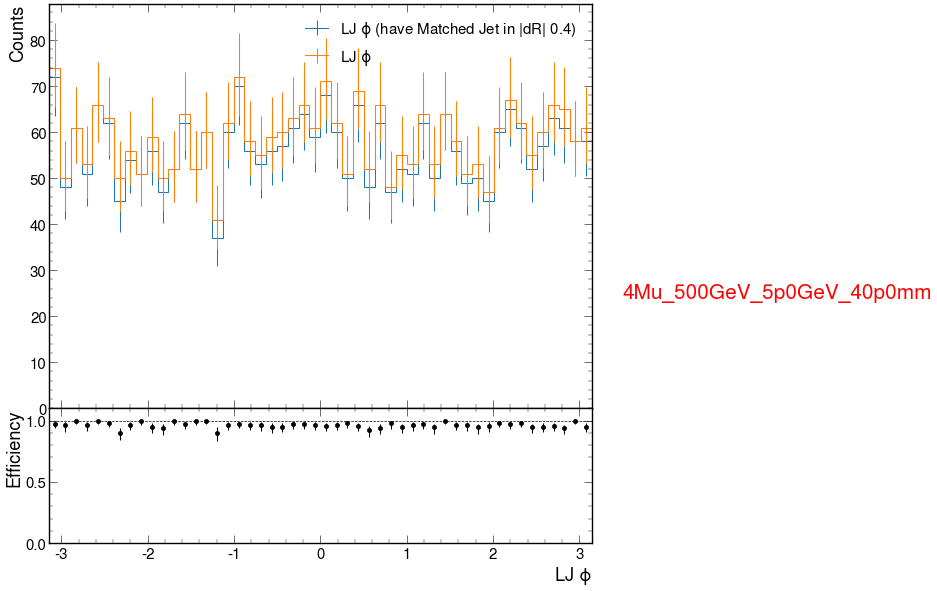

In [18]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_40p0mm"]["hists"]["lj_phi_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_40p0mm"]["hists"]["lj_phi"][channels[0],:], 
       rp_num_label="LJ $\phi$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\phi$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\phi$")
plt.text(3.5, 2, "4Mu_500GeV_5p0GeV_40p0mm", fontsize=30, color='r')

Text(550, 2, '4Mu_500GeV_5p0GeV_80p0mm')

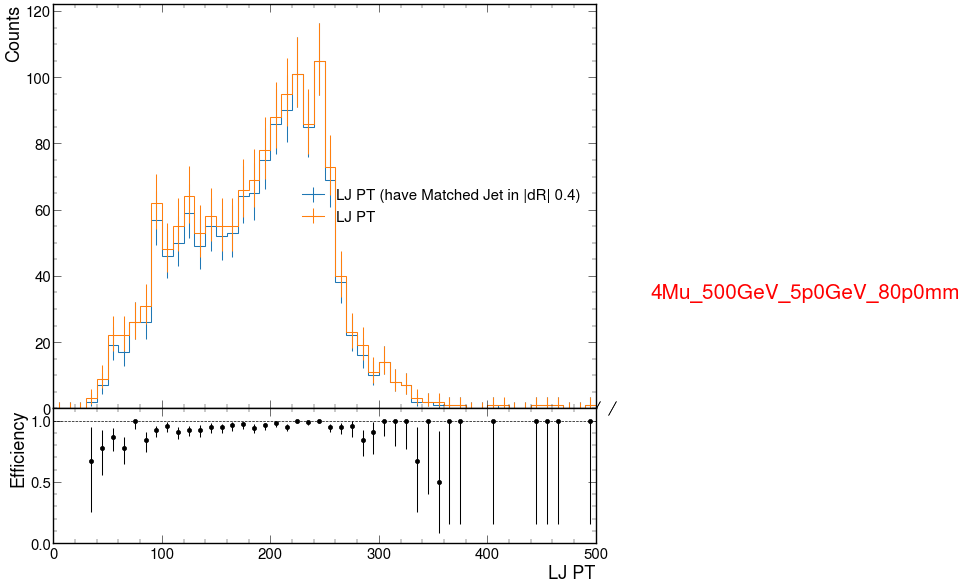

In [19]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="LJ PT (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "4Mu_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(3.5, 2, '4Mu_500GeV_5p0GeV_80p0mm')

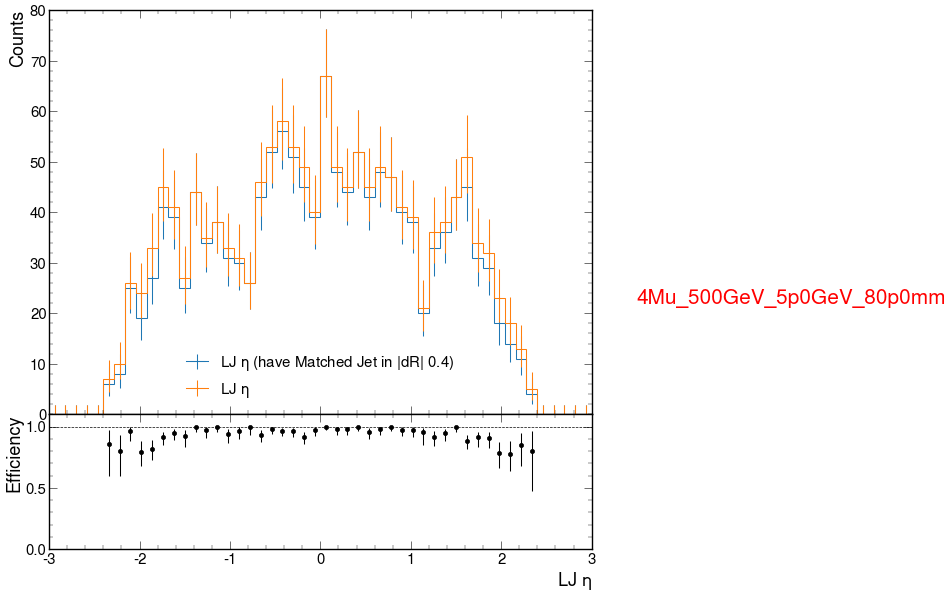

In [20]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_eta_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_eta"][channels[0],:], 
       rp_num_label="LJ $\eta$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\eta$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\eta$")
plt.text(3.5, 2, "4Mu_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(3.5, 2, '4Mu_500GeV_5p0GeV_80p0mm')

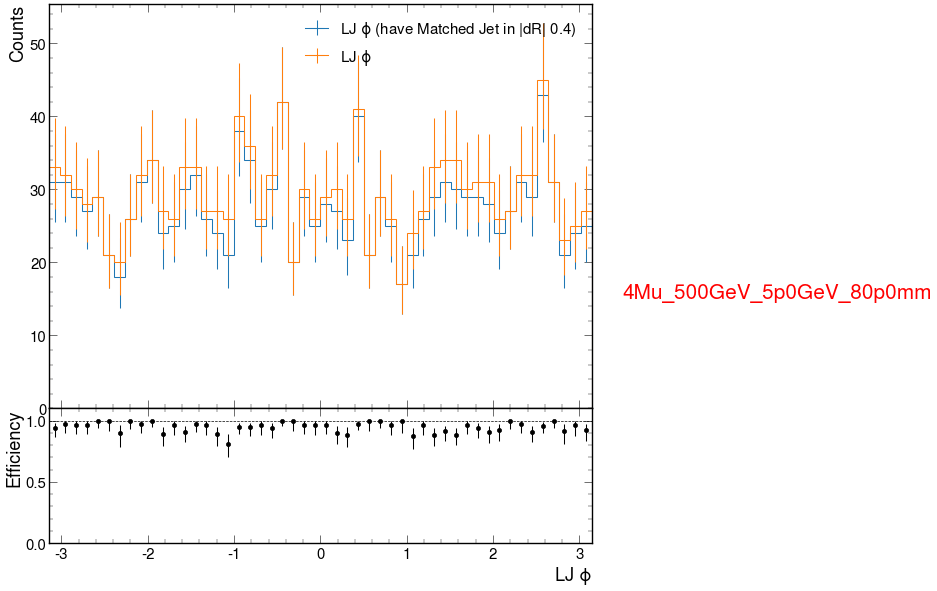

In [21]:
plt.figure(figsize=(14, 14))
out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_phi_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["4Mu_500GeV_5p0GeV_80p0mm"]["hists"]["lj_phi"][channels[0],:], 
       rp_num_label="LJ $\phi$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\phi$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\phi$")
plt.text(3.5, 2, "4Mu_500GeV_5p0GeV_80p0mm", fontsize=30, color='r')

Text(550, 2, 'TTJets')

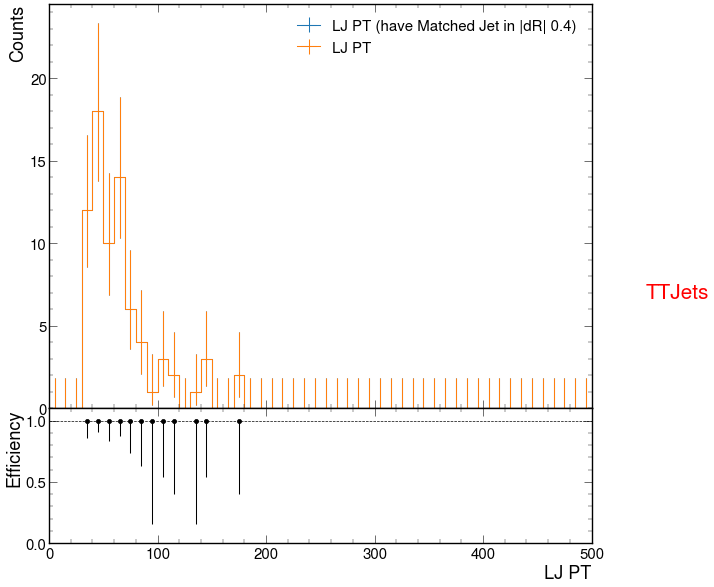

In [22]:
plt.figure(figsize=(14, 14))
out_4mu["TTJets"]["hists"]["lj_pt_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["TTJets"]["hists"]["lj_pt"][channels[0],:], 
       rp_num_label="LJ PT (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ PT",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ PT")
plt.text(550, 2, "TTJets", fontsize=30, color='r')

Text(3.5, 2, 'TTJets')

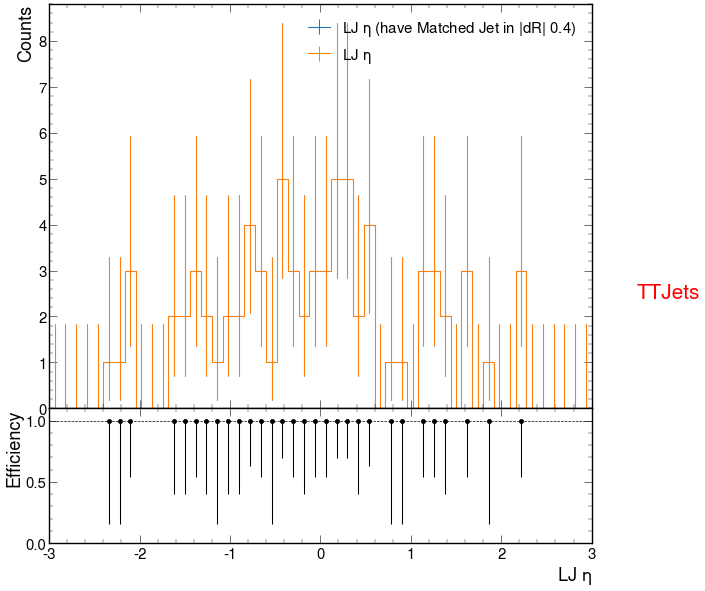

In [23]:
plt.figure(figsize=(14, 14))
out_4mu["TTJets"]["hists"]["lj_eta_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["TTJets"]["hists"]["lj_eta"][channels[0],:], 
       rp_num_label="LJ $\eta$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\eta$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\eta$")
plt.text(3.5, 2, "TTJets", fontsize=30, color='r')

Text(3.5, 2, 'TTJets')

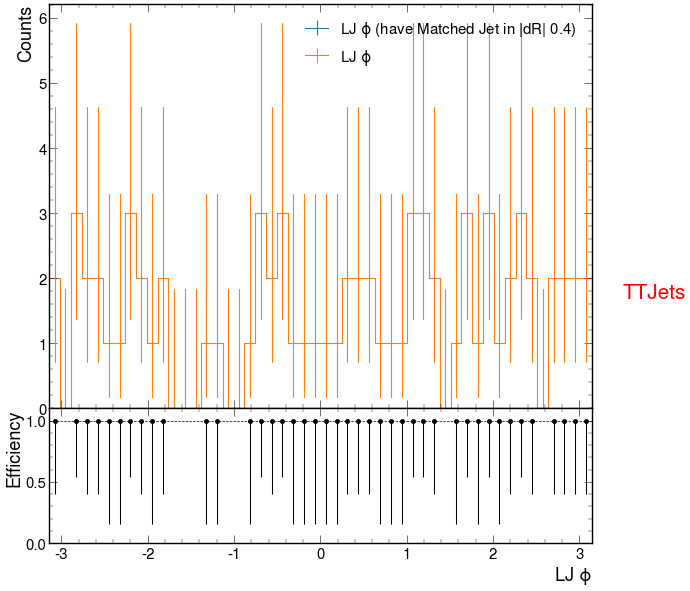

In [24]:
plt.figure(figsize=(14, 14))
out_4mu["TTJets"]["hists"]["lj_phi_with_matched_jet"][channels[0], :].plot_ratio(
       out_4mu["TTJets"]["hists"]["lj_phi"][channels[0],:], 
       rp_num_label="LJ $\phi$ (have Matched Jet in |dR| 0.4)",
       rp_denom_label="LJ $\phi$",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.xlabel("LJ $\phi$")
plt.text(3.5, 2, "TTJets", fontsize=30, color='r')